In [1]:
from src.base_models import *
from src.dataset_lib import *
from src.ode_solvers import *
from src.comp_models import *

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
GaussianMix = GaussianMixture.symmetric_2D(5,std = 0.5)

gaussian_path = GaussianConditionalProbabilityPath(p_data=GaussianMix, alpha=LinearAlpha(), beta = SquareRootBeta(), device=device).to(device)

model1 = BasicMLP(input_dim=2, hidden_dims=[64,64,64,64], conditional=True)

trainer = DiffusionGuidanceTrainer(path=gaussian_path, model=model1, p_uncond=0.1)

trainer.train_loop(num_epochs=20000, device=device, lr=1e-3, n= 2000)

In Epoch 0 we have a loss of 7.886890888214111
In Epoch 1000 we have a loss of 14.171896934509277
In Epoch 2000 we have a loss of 7.140321731567383
In Epoch 3000 we have a loss of 6.173856258392334
In Epoch 4000 we have a loss of 5.4923624992370605
In Epoch 5000 we have a loss of 8.733927726745605
In Epoch 6000 we have a loss of 8.034711837768555
In Epoch 7000 we have a loss of 7.959611892700195
In Epoch 8000 we have a loss of 11.375621795654297
In Epoch 9000 we have a loss of 6.500452995300293
In Epoch 10000 we have a loss of 6.236200332641602
In Epoch 11000 we have a loss of 11.876908302307129
In Epoch 12000 we have a loss of 7.855386734008789
In Epoch 13000 we have a loss of 10.380221366882324
In Epoch 14000 we have a loss of 4.674253940582275
In Epoch 15000 we have a loss of 33.39817810058594
In Epoch 16000 we have a loss of 6.635763168334961
In Epoch 17000 we have a loss of 5.56596040725708
In Epoch 18000 we have a loss of 7.377840995788574
In Epoch 19000 we have a loss of 4.79941

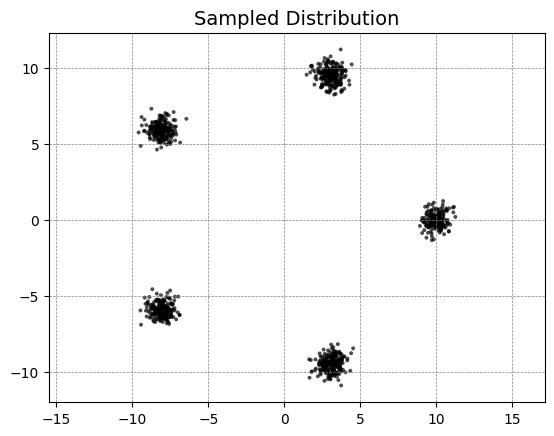

In [3]:
sampels = GaussianMix.sample(1000)
plot_samples(sampels)

In [18]:
sde = ProductGuidanceLangevin([model1,model1], alpha=LinearAlpha(), beta=SquareRootBeta(), sigma=1,guidance_scales=[1.0, 2.0])
solver = EulerSDESolver(sde)
sampler = Sampler(solver)

steps = torch.linspace(0.01, 1, 2000).view(1,-1,1).expand(2000,-1,1).to(device)
gaussian_samples = gaussian_path.p_init.sample(2000)

conditions = [torch.Tensor([10.0,0.0]).expand(gaussian_samples.shape[0], -1).to(device), torch.Tensor([3.0,-10.0]).expand(gaussian_samples.shape[0], -1).to(device)]
final_samples = sampler.sample_without_traj(gaussian_path.p_init.sample(2000), steps, y = conditions)

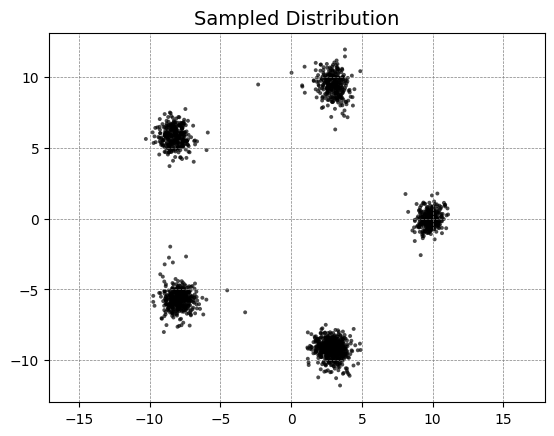

In [19]:
plot_samples(final_samples)
plt.show()